# **BASIC NEURAL NET USING TENSORFLOW**

### This was written with help from the TensorFlow website: https://www.tensorflow.org/tutorials/quickstart/beginner

In [67]:
# IMPORT PACKAGES
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

# *IMPORT AND EXPLORE DATA*

In [81]:
# FASHION DATASET FROM MNIST
fashion = tf.keras.datasets.fashion_mnist

# SPLIT INTO TEST AND TRAIN
(x_train, y_train), (x_test, y_test) = fashion.load_data()

In [82]:
# GET THE NAME OF THE PIECES OF CLOTHING
names = ['Top', 'Trousers', 'Jumper', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Shoe', 'Bag', 'Ankle boot']

In [83]:
# DATA SHAPE
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

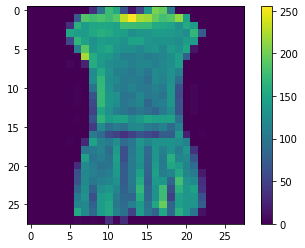

In [84]:
# EXAMPLE FIGURE
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()
plt.show()

In [85]:
# SCALE DATA BETWEEN 0 AND 1
x_train = x_train / 255.0
x_test = x_test / 255.0

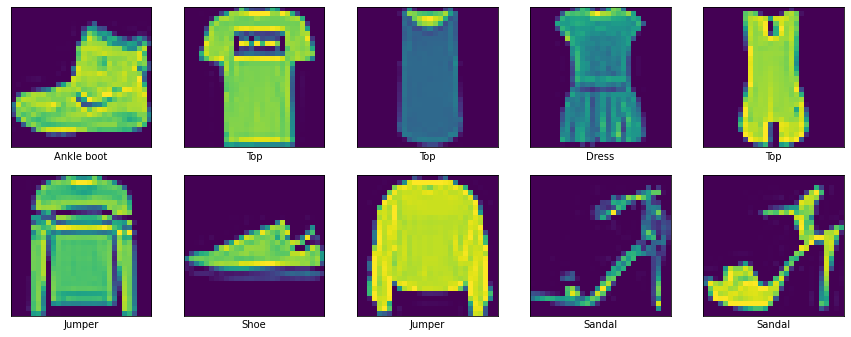

In [98]:
# CONFIRM IMAGE LABELS ARE CORRECT
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(names[y_train[i]])
plt.show()

### LOOKS CORRECT!

# *NEURAL NETWORK MODEL*

In [87]:
# ONE HIDDEN LAYER NN USING KERAS
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # ONE DIM ARRAY WITH 28 X 28 COMPONENTS
    tf.keras.layers.Dropout(0.2), # DROP OUT TO PREVENT OVERFITTING
    tf.keras.layers.Dense(20, activation='tanh', kernel_regularizer=regularizers.l2(0.0001)), # HIDDEN LAYER, AND L2 REG
    tf.keras.layers.Dense(10) # OUTPUT WITH 10 POSSIBILITIES
])

In [88]:
# SETTINGS FOR THE MODEL
model.compile(optimizer='Adam', # RMSprop and Momentum
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # cost function
              metrics=['accuracy']) # WANT THE ACC OF THE MODEL

In [89]:
# TRAIN THE MODEL
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8269 - accuracy: 0.7293
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4819 - accuracy: 0.8322
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4478 - accuracy: 0.8425
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4287 - accuracy: 0.8488
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4214 - accuracy: 0.8534


In [90]:
# ACCURACY
cost, acc = model.evaluate(x_test,  y_test, verbose=2)
print('Accuracy:', acc)

313/313 - 0s - loss: 0.4265 - accuracy: 0.8527
Accuracy: 0.8526999950408936


### Both training and test data are similar so our dropout and regularization has worked effectively

# *PREDICTIONS*

In [91]:
# SOFTMAX TO SCALE THE OUTPUTS TO PROBABILITIES
probability = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
preds = probability.predict(x_test)

In [93]:
# CONFIRM THE ALGORITHM WITH AN EXAMPLE
print(preds[10])

[9.0810918e-04 1.9323626e-04 3.0452594e-01 1.6746841e-03 6.2145835e-01
 6.2942044e-03 6.4657845e-02 7.7329451e-06 9.5861811e-05 1.8404615e-04]


In [95]:
# GET MAX INDEX
print(names[np.argmax(preds[10])])

Coat


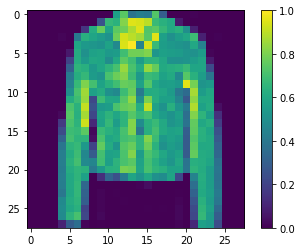

In [96]:
# IS IT A COAT?
plt.figure()
plt.imshow(x_test[10])
plt.colorbar()
plt.show()

# *LOOKS GOOD!*